**Grupo: Mateus da Silva Romani e Vinicius da Silva Dias**

# Pre-processing the data

### Importing the libraries

For this project, we will use the following libraries:

In [1]:
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
from torch.optim import SGD
from sklearn.metrics import get_scorer_names

Now we must import the data. We will use the dataset gathered from our own web scraping script. The data is stored in a CSV file, which we will import using the Pandas library.

In [2]:
# Load the data
df = pd.read_csv("../site_scrapper/cleaned_data.csv")

# Printing the first 5 rows
df.head()

,stickers,paintwear,name,steam_price,quality,rarity,type,price
0,0,0.738805,StatTrak™ MP5-SD | Necro Jr. (Battle-Scarred),0.28,1,8,SMGs,1.50
1,0,0.727373,StatTrak™ MP5-SD | Necro Jr. (Battle-Scarred),0.28,1,8,SMGs,1.53
2,0,0.560139,StatTrak™ MP5-SD | Necro Jr. (Battle-Scarred),0.28,1,8,SMGs,1.55
3,0,0.598293,StatTrak™ MP5-SD | Necro Jr. (Battle-Scarred),0.28,1,8,SMGs,1.57
4,0,0.787770,StatTrak™ MP5-SD | Necro Jr. (Battle-Scarred),0.28,1,8,SMGs,1.70


In [3]:
# Showing the types using np.unique
np.unique(df["type"])

array(['Agent', 'Knives', 'Machineguns', 'Pistols', 'SMGs', 'Shotguns',
       'Sniper Rifles', 'Sticker', 'Weapon Cases'], dtype=object)

## Cleaning the data

When working with data, an important step is to clean it. This means that we must remove any information that might be irrelevant or that might cause problems in the future. In this case, we will check if there are any invalid values in the dataset and remove them.

In [4]:
# Verifying NaN values
df.isnull().sum()

stickers          0
paintwear      2580
name              0
steam_price       0
quality           0
rarity            0
type              0
price             0
dtype: int64

In [5]:
# Dropping NaN values
df = df.dropna()
df = df.drop(columns=["name"])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3300 entries, 0 to 5879
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   stickers     3300 non-null   int64  
 1   paintwear    3300 non-null   float64
 2   steam_price  3300 non-null   float64
 3   quality      3300 non-null   int64  
 4   rarity       3300 non-null   int64  
 5   type         3300 non-null   object 
 6   price        3300 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 206.2+ KB


## Encoding the categorical data

After dropping the invalid values, we must encode the categorical data. This means that we must convert the categorical data into numerical data. This is necessary because the machine learning algorithms we will use later can only work with numerical data.

In [6]:
# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(df["type"], dtype=np.int64)
df = pd.concat([df, one_hot_encoded], axis=1)
df = df.drop(columns=["type"])

df.head()

,stickers,paintwear,steam_price,quality,rarity,price,Knives,Machineguns,Pistols,SMGs,Shotguns,Sniper Rifles
0,0,0.738805,0.28,1,8,1.50,0,0,0,1,0,0
1,0,0.727373,0.28,1,8,1.53,0,0,0,1,0,0
2,0,0.560139,0.28,1,8,1.55,0,0,0,1,0,0
3,0,0.598293,0.28,1,8,1.57,0,0,0,1,0,0
4,0,0.787770,0.28,1,8,1.70,0,0,0,1,0,0


## Standardizing the data

Now that we have encoded the categorical data, we must standardize the numerical data. This means that we must scale the numerical data so that it has a mean of 0 and a standard deviation of 1.

In [7]:
##Applying MinMaxScaler to the data

df = df - np.min(df, axis=0) / np.max(df, axis=0) - np.min(df, axis=0)

print(df.head())

   stickers  paintwear  steam_price  quality    rarity     price  Knives  \
0       0.0   0.719036    -0.000277      3.0 -0.727273 -0.000314     0.0   
1       0.0   0.707604    -0.000277      3.0 -0.727273  0.029686     0.0   
2       0.0   0.540370    -0.000277      3.0 -0.727273  0.049686     0.0   
3       0.0   0.578524    -0.000277      3.0 -0.727273  0.069686     0.0   
4       0.0   0.768001    -0.000277      3.0 -0.727273  0.199686     0.0   

   Machineguns  Pistols  SMGs  Shotguns  Sniper Rifles  
0          0.0      0.0   1.0       0.0            0.0  
1          0.0      0.0   1.0       0.0            0.0  
2          0.0      0.0   1.0       0.0            0.0  
3          0.0      0.0   1.0       0.0            0.0  
4          0.0      0.0   1.0       0.0            0.0  


## Plotting a Scatter Matrix

The scatter matrix is a useful tool for visualizing the data. It plots all the numerical data against each other in a grid of scatter plots. This allows us to see if there are any correlations between the features.

In [8]:
fig = px.scatter_matrix(df, dimensions=df.columns)
fig.update_layout(
    title="Scatter plot of all the features",
    autosize=True,
    width=1000,
    height=1000,
)
fig.update_yaxes(automargin=True)

fig.show()

In [9]:
# Table of correlation
df.corr()

,stickers,paintwear,steam_price,quality,rarity,price,Knives,Machineguns,Pistols,SMGs,Shotguns,Sniper Rifles
stickers,1.000000,-0.100797,-0.111367,0.051977,-0.188472,-0.112344,-0.138605,-0.138605,0.036934,-0.092979,0.121588,0.213238
paintwear,-0.100797,1.000000,-0.404671,0.498124,-0.071969,-0.403383,-0.271636,-0.189197,-0.042655,0.526633,0.049048,0.081000
steam_price,-0.111367,-0.404671,1.000000,-0.671245,0.638226,0.999925,0.803514,-0.182518,-0.233120,-0.122732,-0.122163,-0.169279
quality,0.051977,0.498124,-0.671245,1.000000,-0.837079,-0.676720,-0.833333,0.083333,0.108253,0.670820,0.055902,0.083333
rarity,-0.188472,-0.071969,0.638226,-0.837079,1.000000,0.643592,0.787839,-0.175075,-0.227429,-0.440415,-0.117444,0.065653
price,-0.112344,-0.403383,0.999925,-0.676720,0.643592,1.000000,0.810030,-0.184129,-0.234799,-0.123785,-0.123232,-0.170663
Knives,-0.138605,-0.271636,0.803514,-0.833333,0.787839,0.810030,1.000000,-0.222222,-0.288675,-0.149071,-0.149071,-0.222222
Machineguns,-0.138605,-0.189197,-0.182518,0.083333,-0.175075,-0.184129,-0.222222,1.000000,-0.288675,-0.149071,-0.149071,-0.222222
Pistols,0.036934,-0.042655,-0.233120,0.108253,-0.227429,-0.234799,-0.288675,-0.288675,1.000000,-0.193649,-0.193649,-0.288675
SMGs,-0.092979,0.526633,-0.122732,0.670820,-0.440415,-0.123785,-0.149071,-0.149071,-0.193649,1.000000,-0.100000,-0.149071


For a better visualization of the correlations, we will use a heatmap.

<Axes: >

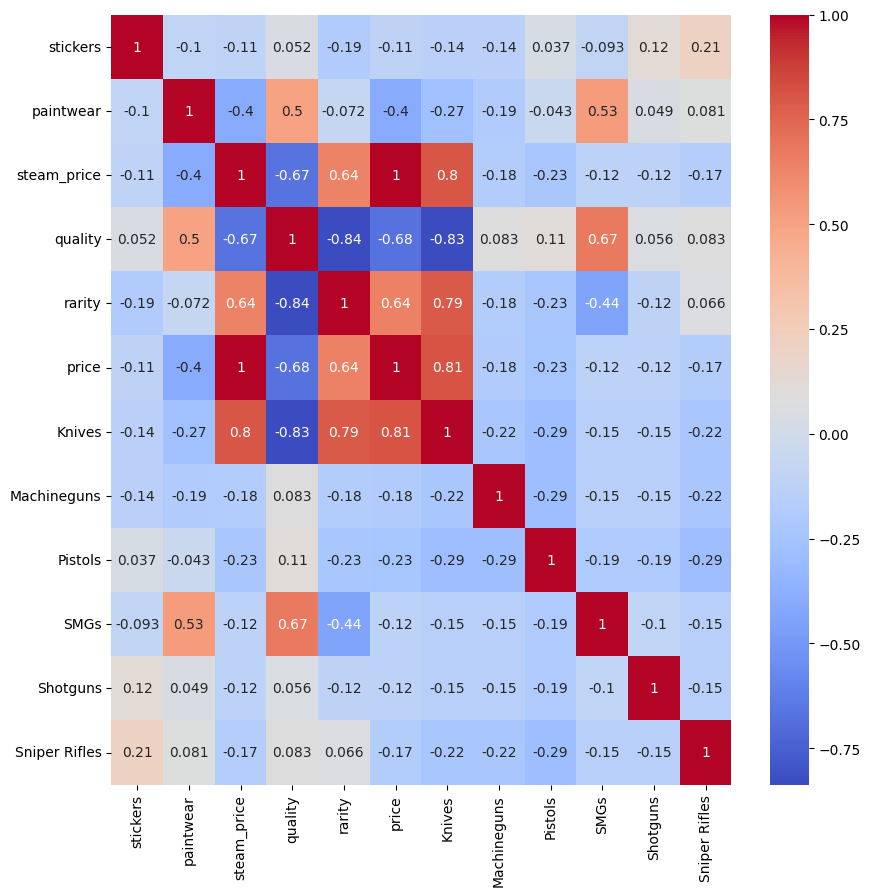

In [10]:
# Correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

In [11]:
# Splitting the data into train and test

y = df["price"]
X = df.iloc[:, :7]
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

(3300, 7)
(3300,)


In [12]:
clf = tree.DecisionTreeRegressor(random_state=42, max_depth=5)
clf = clf.fit(X_train, y_train)

[Text(0.5482954545454546, 0.9166666666666666, 'steam_price <= 605.405\nsquared_error = 1780233.709\nsamples = 2640\nvalue = 512.636'),
 Text(0.30113636363636365, 0.75, 'quality <= 1.5\nsquared_error = 87132.143\nsamples = 2411\nvalue = 110.732'),
 Text(0.14772727272727273, 0.5833333333333334, 'price <= 1001.0\nsquared_error = 58.389\nsamples = 238\nvalue = 1000.806'),
 Text(0.09090909090909091, 0.4166666666666667, 'price <= 992.5\nsquared_error = 23.058\nsamples = 114\nvalue = 993.815'),
 Text(0.045454545454545456, 0.25, 'price <= 988.25\nsquared_error = 0.062\nsamples = 48\nvalue = 988.25'),
 Text(0.022727272727272728, 0.08333333333333333, 'squared_error = -0.0\nsamples = 24\nvalue = 988.0'),
 Text(0.06818181818181818, 0.08333333333333333, 'squared_error = 0.0\nsamples = 24\nvalue = 988.5'),
 Text(0.13636363636363635, 0.25, 'price <= 997.5\nsquared_error = 0.868\nsamples = 66\nvalue = 997.863'),
 Text(0.11363636363636363, 0.08333333333333333, 'squared_error = -0.0\nsamples = 21\nvalue

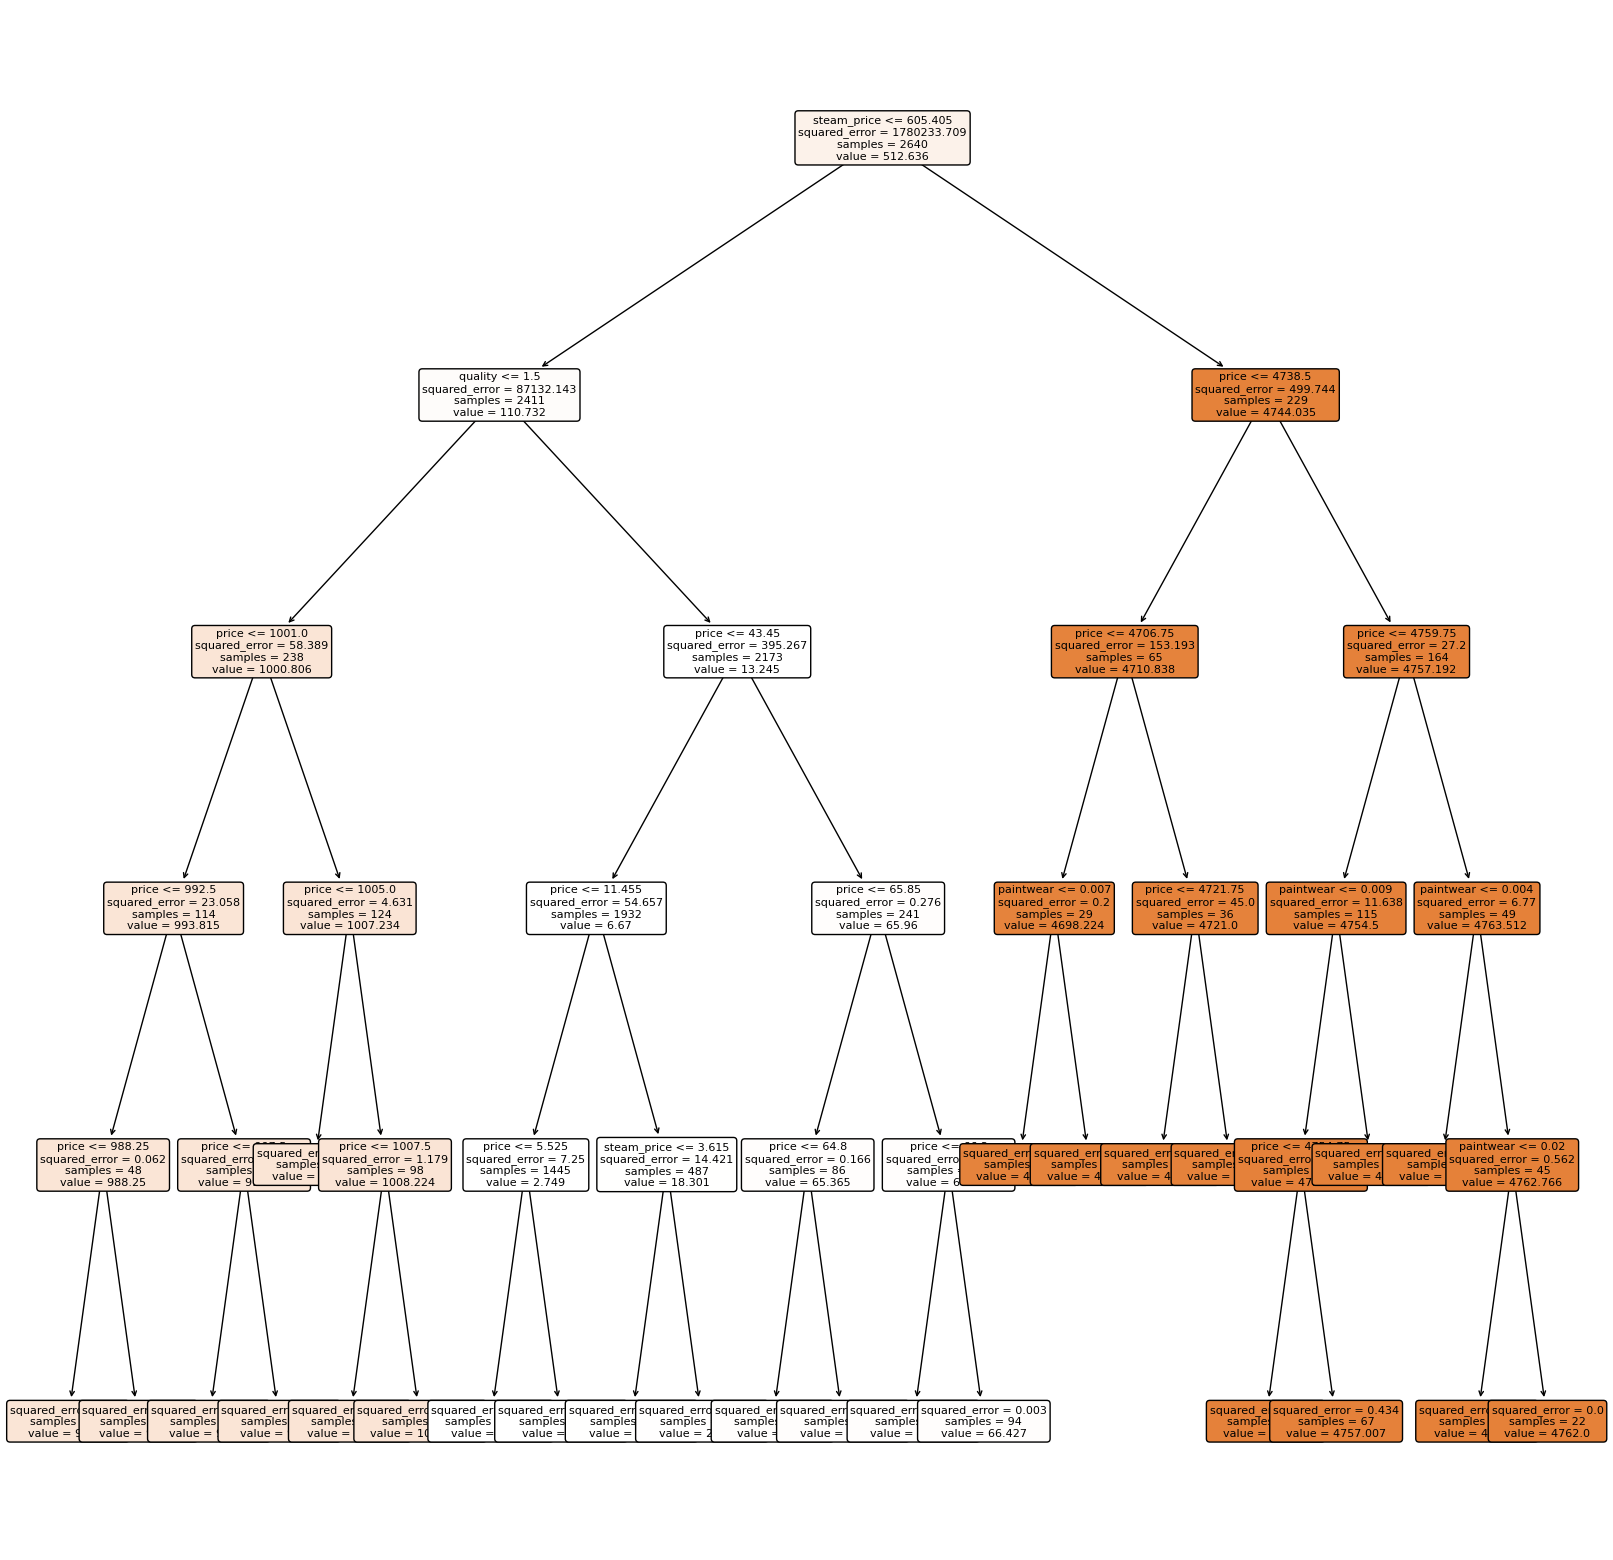

In [13]:
# Plotting the tree
plt.figure(figsize=(20, 20))
tree.plot_tree(clf, filled=True, feature_names=X.columns, rounded=True, fontsize=8)

y_test: 68       0.349686
1195     8.739686
2215    14.499686
3780    14.369686
375      2.549686
Name: price, dtype: float64
y_predict: [ 1.65541777  8.35311796 14.46685243 14.46685243  1.65541777]
Mean Absolute Error: 0.5840232743503379
MAPE: 17.49 
Root Mean Squared Error: 0.794025415916706
Coefficient of Determination: 1.00


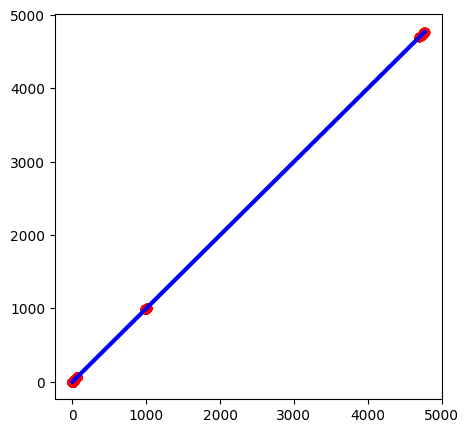

In [14]:
# Printing the metrics of the model
y_predict = clf.predict(X_test)

print("y_test:", y_test[0:5])
print("y_predict:", y_predict[0:5])

print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_predict))
print("MAPE: %.2f " % (np.mean(np.abs((y_test - y_predict) / y_test))))
print(
    "Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_predict))
)
print("Coefficient of Determination: %.2f" % metrics.r2_score(y_test, y_predict))

# Plotting the outputs
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_predict, color="red")
plt.plot(
    np.arange(np.min(y_test), np.max(y_test)),
    np.arange(np.min(y_test), np.max(y_test)),
    color="blue",
    linewidth=3,
)
plt.show()

In [15]:
# Creating the tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float).reshape(-1, 1)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float).reshape(-1, 1)

# Creating the dataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Creating the dataloader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)


# Creating the model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(7, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)


model = MLP()

# Defining the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [16]:
# Training the model
epochs = 100
for epoch in range(epochs):
    for X, y in train_loader:
        optimizer.zero_grad()
        output = model(X)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
    print("epoch {}, loss {}".format(epoch, loss.item()))

epoch 0, loss 15814.9423828125
epoch 1, loss 324.04034423828125
epoch 2, loss 0.039707355201244354
epoch 3, loss 0.4815724790096283
epoch 4, loss 0.009923171252012253
epoch 5, loss 0.0064264205284416676
epoch 6, loss 0.31130629777908325
epoch 7, loss 0.3271014094352722
epoch 8, loss 0.0013996431371197104
epoch 9, loss 0.004147758707404137
epoch 10, loss 0.08338890969753265
epoch 11, loss 0.3831544518470764
epoch 12, loss 0.162238210439682
epoch 13, loss 0.3560514748096466
epoch 14, loss 0.12237605452537537
epoch 15, loss 0.5214971899986267
epoch 16, loss 0.5224109888076782
epoch 17, loss 0.3397487699985504
epoch 18, loss 0.33352282643318176
epoch 19, loss 0.27635645866394043
epoch 20, loss 0.5733657479286194
epoch 21, loss 0.5394658446311951
epoch 22, loss 0.49482461810112
epoch 23, loss 0.2757242023944855
epoch 24, loss 0.14895041286945343
epoch 25, loss 0.2150540053844452
epoch 26, loss 0.19791390001773834
epoch 27, loss 0.442606657743454
epoch 28, loss 0.26711949706077576
epoch 29, 

In [17]:
# Testing the model
with torch.no_grad():
    for X_test, y_test in test_loader:
        y_pred_MLP = model(X_test)
        loss = criterion(y_pred_MLP, y_test)
    print("Loss in the test set: {}".format(loss))

Loss in the test set: 0.0725979134440422


In [18]:
print("price predicted: ", y_predict[:5])
print("real price: ", y_test_tensor[:5])
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test_tensor, y_predict))
print("Mean Squared Error:", metrics.mean_squared_error(y_test_tensor, y_predict))
print(
    "Root Mean Squared Error:",
    np.sqrt(metrics.mean_squared_error(y_test_tensor, y_predict)),
)
print("Coefficient of Determination: %.2f" % metrics.r2_score(y_test_tensor, y_predict))

price predicted:  [ 1.65541777  8.35311796 14.46685243 14.46685243  1.65541777]
real price:  tensor([[ 0.3497],
        [ 8.7397],
        [14.4997],
        [14.3697],
        [ 2.5497]])
Mean Absolute Error: 0.5840385513796759
Mean Squared Error: 0.6304770086890795
Root Mean Squared Error: 0.794025823691572
Coefficient of Determination: 1.00


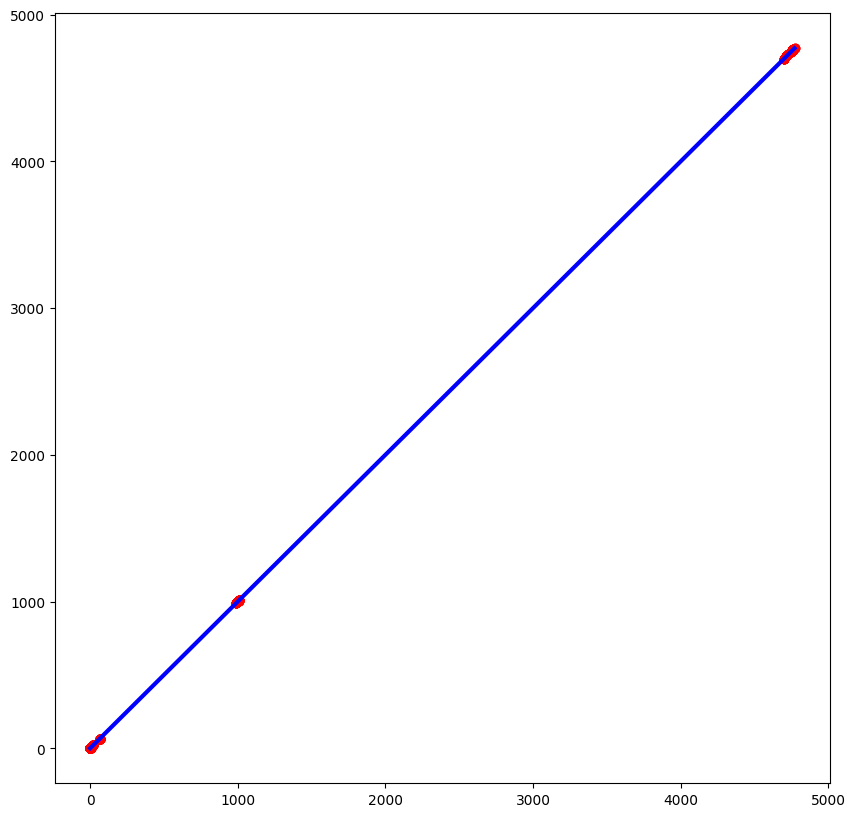

In [19]:
# Printing the metrics of the model
y_predict = model(X_test_tensor).detach().numpy()
y_test_tensor = y_test_tensor.detach().numpy()

# Plotting the outputs
plt.figure(figsize=(10, 10))
plt.scatter(y_test_tensor, y_predict, color="red")
plt.plot(
    np.arange(np.min(y_test_tensor), np.max(y_test_tensor)),
    np.arange(np.min(y_test_tensor), np.max(y_test_tensor)),
    color="blue",
    linewidth=3,
)
plt.show()

In [20]:
# Saving the model
torch.save(model.state_dict(), "../MLP_model.pt")

In [21]:
# Loading the saved model
model = MLP()
model.load_state_dict(torch.load("../MLP_model.pt"))
model.eval()

MLP(
  (fc1): Linear(in_features=7, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=1, bias=True)
)

melhorar cross validation

utilizar o MAPE


In [31]:
estimator = MLPRegressor(hidden_layer_sizes=(64, 128), max_iter=100, alpha=0.001)

# Perform cross-validation
scores = cross_val_score(
    estimator, X, y, cv=5, scoring="neg_mean_absolute_percentage_error"
)

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Print the mean and standard deviation of the scores
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores: [-7.15283051 -0.09987576 -0.0713507  -0.10775276 -0.19827948]
Mean score: -1.5260178434913978
Standard deviation: 2.8137279019891546


/home/mateusromani/Documents/personal/web_scrapper/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/mateusromani/Documents/personal/web_scrapper/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/mateusromani/Documents/personal/web_scrapper/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/mateusromani/Documents/personal/web_scrapper/venv/lib/python3.10/site-packages/sklearn/neural_networ

## Linear Regression Model

### Defining the model class containing the linear regression model

In [23]:
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

### Preparing the data

In [24]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float).reshape(-1, 1)

# Define the number of input features and output targets
input_size = X_train.shape[1]
output_size = 1

### Instantiating the model and defining the loss function and optimizer

In [25]:
# Instantiate the model
model = LinearRegression(input_size, output_size)

# Define the loss function
criterion = nn.MSELoss()

# Define the optimizer
optimizer = SGD(model.parameters(), lr=0.01)

### Training the model

In [26]:
num_epochs = 100

for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: nan
Epoch [20/100], Loss: nan
Epoch [30/100], Loss: nan
Epoch [40/100], Loss: nan
Epoch [50/100], Loss: nan
Epoch [60/100], Loss: nan
Epoch [70/100], Loss: nan
Epoch [80/100], Loss: nan
Epoch [90/100], Loss: nan
Epoch [100/100], Loss: nan


### Using the model to predict

In [27]:
# Using the model to predict
with torch.no_grad():
    y_predicted = model(X_train_tensor).detach().numpy()
    y_test_tensor = y_train_tensor.detach().numpy()

print("price predicted: ", y_predicted[:6])
print("real price: ", y_test_tensor[:6])
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test_tensor, y_predicted))
print("Mean Squared Error:", metrics.mean_squared_error(y_test_tensor, y_predicted))
print(
    "Root Mean Squared Error:",
    np.sqrt(metrics.mean_squared_error(y_test_tensor, y_predicted)),
)
print(
    "Coefficient of Determination: %.2f" % metrics.r2_score(y_test_tensor, y_predicted)
)

price predicted:  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
real price:  [[   2.2696857]
 [   2.8796856]
 [   2.2996857]
 [  21.999685 ]
 [  22.499685 ]
 [1008.4997   ]]


ValueError: Input contains NaN.

In [ ]:
# Ploting graph of predicted and real values
plt.figure(figsize=(5, 5))
plt.scatter(y_test_tensor, y_predicted, color="red")
plt.plot(
    np.arange(np.min(y_test_tensor), np.max(y_test_tensor)),
    np.arange(np.min(y_test_tensor), np.max(y_test_tensor)),
    color="blue",
    linewidth=3,
)
plt.show()

In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin
import torch
import torch.nn as nn


class TorchLinearRegression(BaseEstimator, RegressorMixin):
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.model = nn.Linear(input_size, output_size)

    def fit(self, X, y):
        X_tensor = torch.tensor(X, dtype=torch.float32)
        y_tensor = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)
        criterion = nn.MSELoss()
        optimizer = torch.optim.SGD(self.model.parameters(), lr=0.01)

        for epoch in range(100):
            optimizer.zero_grad()
            outputs = self.model(X_tensor)
            loss = criterion(outputs, y_tensor)
            loss.backward()
            optimizer.step()

    def predict(self, X):
        X_tensor = torch.tensor(X, dtype=torch.float32)
        with torch.no_grad():
            predictions = self.model(X_tensor).numpy()
        return predictions


# Create an instance of the custom estimator
estimator = TorchLinearRegression(input_size=7, output_size=1)

# Perform cross-validation
scores = cross_val_score(estimator, X, y, cv=3)

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Print the mean and standard deviation of the scores
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

# Saving the model
torch.save(estimator.model.state_dict(), "../Linear_model.pt")